
<left>
    <h1>Data Preparation</h1>
    <h5>Bagian ini merupakan tahapan preprocessing dari pembangunan model</h5>
</left>


---


<h3>STEP 1 - DATA  COLLECTION AND LOADING</h3>


<p>Data Collection phase involves systematic collection of datasets that can be used as raw data to train model. The quality and variety of data directly affect the model’s performance.</p>

<p>Here are some basic features of Data Collection: </p>

<ul>
    <li>Relevance: Collect data should be relevant to the defined problem and include necessary features.</li>
    <li>Quality: Ensure data quality by considering factors like accuracy and ethical use.</li>
    <li>Quantity: Gather sufficient data volume to train a robust model.</li>
    <li>Diversity: Include diverse datasets to capture a broad range of scenarios and patterns.</li>
</ul>

<br/>

<p>Data yang digunakan bersumber dari NHANES 2021 - 2023</p>
<p>Dataset Source : </p>

- https://wwwn.cdc.gov/nchs/nhanes/search/datapage.aspx?Component=Laboratory&Cycle=2021-2023``

<br/>

---


In [1]:
import pandas as pd

# File CSV
file_glucose = "Dataset/guladarahpuasa.csv"
file_hba1c = "Dataset/hba1c.csv"
file_insulin = "Dataset/insulin.csv"
file_demografi = "Dataset/demografi.csv"
file_tekanandarah = "Dataset/tekanandarah.csv"
file_bmi = "Dataset/bmi.csv"
file_gabungan = "Dataset/data_gabungan.csv"
file_bersih = "Dataset/data_bersih.csv"
file_label = "Dataset/data_labeled.csv"
file_hdl ="Dataset/hdl.csv"
file_scaled ="Dataset/data_scaled.csv"
file_scaled_clean ="Dataset/data_scaled_clean.csv"
# Baca dengan delimiter titik koma
df_glucose = pd.read_csv(file_glucose, sep=";")
df_hba1c   = pd.read_csv(file_hba1c, sep=";")
df_insulin = pd.read_csv(file_insulin, sep=";")
df_demografi = pd.read_csv(file_demografi, sep=";")
df_tekanandarah = pd.read_csv(file_tekanandarah, sep=";")
df_bmi = pd.read_csv(file_bmi, sep=";")
df_data_gabungan = pd.read_csv(file_gabungan, sep=";")
df_data_bersih = pd.read_csv(file_bersih, sep=";")
df_data_label = pd.read_csv(file_label, sep=";")
df_hdl = pd.read_csv(file_hdl, sep=";")   
df_scaled = pd.read_csv(file_scaled, sep=";")
df_scaled_clean = pd.read_csv(file_scaled_clean, sep=";")

# Tampilkan 5 baris pertama
print("✅ Data Glukosa:")
print(df_glucose.head(), "\n")

print("✅ Data HbA1c:")
print(df_hba1c.head(), "\n")

print("✅ Data Insulin:")
print(df_insulin.head(),"\n")

print("✅ Data demografi:")
print(df_demografi.head(), "\n")

print("✅ Data tekanan darah:")
print(df_tekanandarah.head(), "\n")

print("✅ Data Bmi:")
print(df_bmi.head(),"\n")

print("✅ Data Gabungan:")
print(df_data_gabungan.head(),"\n")

print("✅ Data Bersih:")
print(df_data_bersih.head(),"\n")

print("✅ Data hdl:")
print(df_hdl.head(),"\n")

✅ Data Glukosa:
       SEQN   fgb
0  130378.0  6.27
1  130379.0  5.50
2  130380.0  8.66
3  130386.0  5.55
4  130394.0  4.88 

✅ Data HbA1c:
       SEQN  LBXGH
0  130378.0    5.6
1  130379.0    5.6
2  130380.0    6.2
3  130386.0    5.1
4  130387.0    5.9 

✅ Data Insulin:
       SEQN  LBDINSI
0  130378.0    93.18
1  130379.0   119.46
2  130380.0    97.98
3  130386.0    68.28
4  130394.0    43.20 

✅ Data demografi:
       SEQN   age
0  130378.0  43.0
1  130379.0  66.0
2  130380.0  44.0
3  130381.0   5.0
4  130382.0   2.0 

✅ Data tekanan darah:
       SEQN  systolyc2  Dystolyc 2  Systolyc3  Dyastolic 3
0  130378.0      131.0        96.0      132.0         94.0
1  130379.0      117.0        76.0      113.0         76.0
2  130380.0      112.0        80.0      104.0         76.0
3  130386.0      120.0        74.0      115.0         75.0
4  130387.0      136.0        74.0      145.0         78.0 

✅ Data Bmi:
       SEQN  berat  tinggi    BMI
0  130378.0   86.9   179.5  26.97
1  130379.0  1

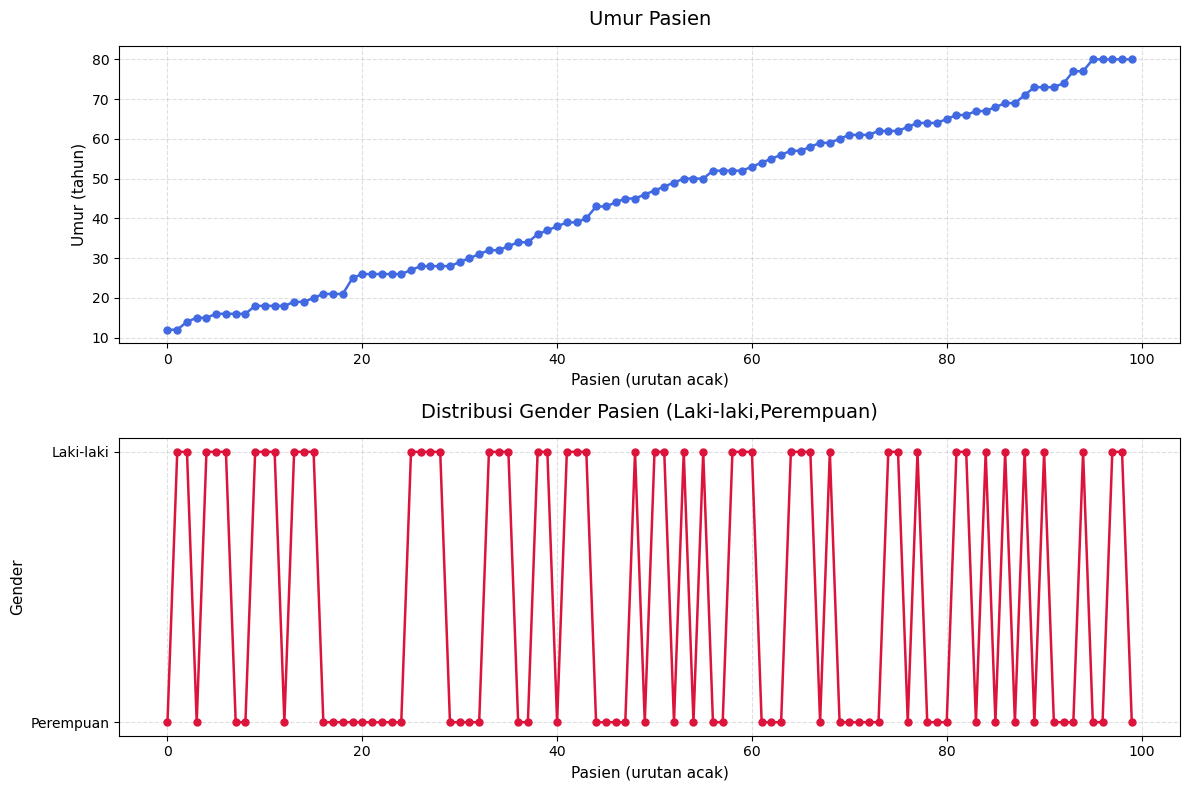

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Load data ---
df = pd.read_csv("Dataset/datalabel_withgender.csv", sep=';')

# --- 2. Gabungkan kolom gender jadi satu kolom ---
df['gender'] = df.apply(lambda x: 1 if x['genderLK'] == 1 else 0, axis=1)
df['gender_label'] = df['gender'].map({1: 'Laki-laki', 0: 'Perempuan'})

# --- 3. Buang NA dan ambil sebagian data agar jelas di plot ---
df = df.dropna(subset=['age', 'gender'])
df = df.sample(100, random_state=42).sort_values(by='age')  # ambil 100 sampel agar tidak terlalu padat

# --- 4. Buat sumbu X dengan jarak antar titik (simulasi tren waktu) ---
x_axis = np.arange(len(df))

# --- 5. Buat figure ---
plt.figure(figsize=(12, 8))

# === Plot 1: Tren Umur ===
plt.subplot(2, 1, 1)
plt.plot(x_axis, df['age'], color='royalblue', marker='o', markersize=5, linewidth=1.8)
plt.title('Umur Pasien', fontsize=14, pad=15)
plt.xlabel('Pasien (urutan acak)', fontsize=11)
plt.ylabel('Umur (tahun)', fontsize=11)
plt.grid(True, linestyle='--', alpha=0.4)

# === Plot 2: Tren Gender ===
plt.subplot(2, 1, 2)
plt.plot(x_axis, df['gender'], color='crimson', marker='o', markersize=5, linewidth=1.8)
plt.title('Distribusi Gender Pasien (Laki-laki,Perempuan)', fontsize=14, pad=15)
plt.xlabel('Pasien (urutan acak)', fontsize=11)
plt.ylabel('Gender', fontsize=11)
plt.yticks([0, 1], ['Perempuan', 'Laki-laki'])
plt.grid(True, linestyle='--', alpha=0.4)

# --- Layout & tampilkan ---
plt.tight_layout()
plt.show()


In [5]:
import pandas as pd

# ===== 1. Fungsi Rename =====
def safe_rename(df, prefix):
    """Tambahkan prefix ke semua kolom kecuali SEQN."""
    return df.rename(columns={col: f"{prefix}_{col}" for col in df.columns if col != "SEQN"})


# ===== 3. Rename Kolom Satu Kali Saja =====
bmi = safe_rename(df_bmi, "BMI")
demografi = safe_rename(df_demografi, "DEMOGRAFI")
glucose = safe_rename(df_glucose, "GDP")
hba1c = safe_rename(df_hba1c, "HBA1C")
insulin = safe_rename(df_insulin, "INSULIN")
tekanandarah = safe_rename(df_tekanandarah, "TD")



# ===== 4. Merge Berdasarkan SEQN =====
merged = (
    df_bmi.merge(df_demografi, on="SEQN", how="outer")
          .merge(df_glucose, on="SEQN", how="outer")
          .merge(df_hba1c, on="SEQN", how="outer")
          .merge(df_insulin, on="SEQN", how="outer")
          .merge(df_tekanandarah, on="SEQN", how="outer")
         
)

# ===== 5. Urutkan Berdasarkan SEQN =====
merged = merged.sort_values(by="SEQN")

# ===== 6. Simpan Hasil Gabungan =====
output_path = "D:\KULIAH\SEMESTER 5\MachineLearning\Diabetes_MealPlan_Model/data_gabungan_by_seqn.csv"
merged.to_csv(output_path, index=False)




<>:33: SyntaxWarning: invalid escape sequence '\K'
<>:33: SyntaxWarning: invalid escape sequence '\K'
C:\Users\Frederico\AppData\Local\Temp\ipykernel_16484\44705323.py:33: SyntaxWarning: invalid escape sequence '\K'
  output_path = "D:\KULIAH\SEMESTER 5\MachineLearning\Diabetes_MealPlan_Model/data_gabungan_by_seqn.csv"


<left>
    <h3>STEP 2 - DATA CLEANSING & PREPROCESSING</h3>
    <p>Raw data is often messy and unstructured and if we use this data directly to train then it can lead to poor accuracy. We need to do data cleaning and preprocessing which often involves</p>
</left>

---

<left>
    <h4>DATA CLEANSING</h4>
    <p>Standardize formats, scale values and encode categorical variables for consistency.</p>
</left>

---

In [6]:
df_bersih = df_data_bersih.dropna(how='any', axis=0)
output_path = "D:\KULIAH\SEMESTER 5\MachineLearning\Diabetes_MealPlan_Model/data_bersih.csv"
df_bersih.to_csv(output_path, index=False)

print(f"File gabungan berhasil dibuat: {output_path}")

File gabungan berhasil dibuat: D:\KULIAH\SEMESTER 5\MachineLearning\Diabetes_MealPlan_Model/data_bersih.csv


<>:2: SyntaxWarning: invalid escape sequence '\K'
<>:2: SyntaxWarning: invalid escape sequence '\K'
C:\Users\Frederico\AppData\Local\Temp\ipykernel_16484\2322740477.py:2: SyntaxWarning: invalid escape sequence '\K'
  output_path = "D:\KULIAH\SEMESTER 5\MachineLearning\Diabetes_MealPlan_Model/data_bersih.csv"


In [9]:
df_data_bersih.dropna(how='any', axis=0)

,SEQN,berat,tinggi,BMI,age,fgb,hba1c,insulin,avg_systolyc,avg_dystolyc,hdl
0,130378.0,86.9,179.5,26.97,43.0,6.27,5.6,93.18,131.5,95.0,1.16
1,130379.0,101.8,174.2,33.55,66.0,5.50,5.6,119.46,115.0,76.0,1.55
2,130380.0,69.4,152.9,29.69,44.0,8.66,6.2,97.98,108.0,78.0,1.27
3,130386.0,90.6,173.3,30.17,34.0,5.55,5.1,68.28,117.5,74.5,1.19
4,130387.0,103.5,155.9,42.58,68.0,5.90,136.0,74.00,145.0,78.0,1.09
...,...,...,...,...,...,...,...,...,...,...,...
5533,142303.0,70.8,159.2,27.93,69.0,8.88,8.1,102.54,126.0,68.5,1.40
5534,142305.0,60.4,151.4,26.35,76.0,7.33,6.0,149.16,146.0,78.5,0.93
5535,142307.0,1.0,143.8,0.48,49.0,6.20,132.0,73.00,131.0,72.0,1.63
5536,142309.0,81.9,179.1,25.53,40.0,5.33,5.2,37.32,126.5,81.5,1.71


<left>
    <h5>CHECKING OUTLIER & DATA DELETION</h5>
    <p>Standardize formats, scale values and encode categorical variables for consistency.</p>
</left>

---

In [4]:
# --- 1. Copy data untuk cleaning ---
df_clean = df.copy()

# Buang error input (outlier yang jelas salah, bukan medis ekstrem)
df_clean = df_clean[df_clean['tinggi'] > 80]        # tinggi minimal 80 cm
df_clean = df_clean[df_clean['berat'] > 10]         # berat minimal 10 kg
df_clean = df_clean[df_clean['BMI'] < 70]           # buang BMI ekstrem
df_clean = df_clean[(df_clean['age'] > 0) & (df_clean['age'] < 100)]  # usia wajar

print(f"Jumlah data awal: {df.shape[0]}")
print(f"Jumlah data setelah cleaning: {df_clean.shape[0]}")



Jumlah data awal: 5538
Jumlah data setelah cleaning: 5519


C:\Users\ASUS\AppData\Local\Temp\ipykernel_25932\3196875556.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(
C:\Users\ASUS\AppData\Local\Temp\ipykernel_25932\3196875556.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(


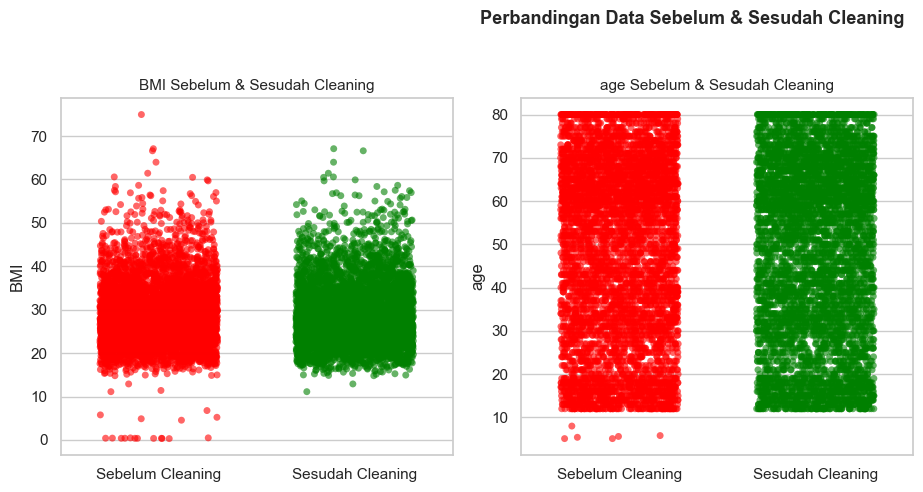

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pilih fitur penting
features = ['BMI', 'age']

# Siapkan data gabungan dengan label status
df_before = df[features].copy()
df_before['Status'] = 'Sebelum Cleaning'

df_after = df_clean[features].copy()
df_after['Status'] = 'Sesudah Cleaning'

df_compare = pd.concat([df_before, df_after])

# --- Plot ---
plt.figure(figsize=(14, 5))

for i, col in enumerate(features, 1):
    plt.subplot(1, 3, i)
    sns.stripplot(
        data=df_compare,
        x='Status',
        y=col,
        jitter=0.3,
        alpha=0.6,
        palette={'Sebelum Cleaning': 'red', 'Sesudah Cleaning': 'green'}
    )
    plt.title(f"{col} Sebelum & Sesudah Cleaning", fontsize=11)
    plt.xlabel("")
    plt.ylabel(col)

plt.suptitle("Perbandingan Data Sebelum & Sesudah Cleaning", fontsize=13, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


<left>
    <h4>DATA PREPROCESSING</h4>
    <p>Standardize formats, scale values and encode categorical variables for consistency.</p>
</left>

---

<left>
    <h5>DATA TRANSFORMATION</h5>
    <p>Convert raw data into a consistent format through scaling, normalization, and encoding to improve model performance.</p>
</left>


In [7]:
import numpy as np
df_clean['insulin_log'] = np.log1p(df_clean['insulin'])  

In [9]:
from sklearn.preprocessing import RobustScaler

# --- 1. Scaling dengan RobustScaler ---
scaler = RobustScaler()
num_cols = ['berat','tinggi','BMI','age','insulin_log',
            'avg_systolyc','avg_dystolyc','hdl']

df_scaled = df_clean.copy()
df_scaled[num_cols] = scaler.fit_transform(df_clean[num_cols])

# --- 2. Simpan hasil scaling ---
df_scaled.to_csv("data_scaled.csv", index=False)

print("\n Hasil scaling:")
print(df_scaled[num_cols].head())



 Hasil scaling:
      berat    tinggi       BMI       age  insulin_log  avg_systolyc  \
0  0.319298  0.903448 -0.088268 -0.257143     0.595396      0.659091   
1  0.842105  0.537931  0.646927  0.400000     1.119262     -0.090909   
2 -0.294737 -0.931034  0.215642 -0.228571     0.701208     -0.409091   
3  0.449123  0.475862  0.269274 -0.514286    -0.058188      0.022727   
4  0.901754 -0.724138  1.655866  0.457143     0.110676      1.272727   

   avg_dystolyc       hdl  
0      1.451613 -0.409091  
1      0.225806  0.477273  
2      0.354839 -0.159091  
3      0.129032 -0.340909  
4      0.354839 -0.568182  


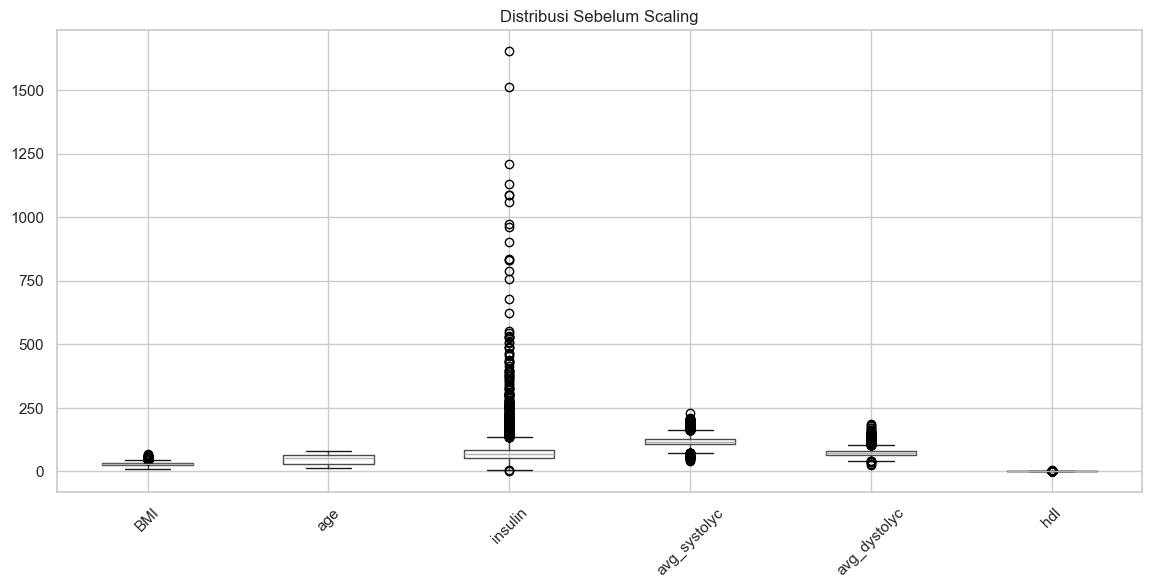

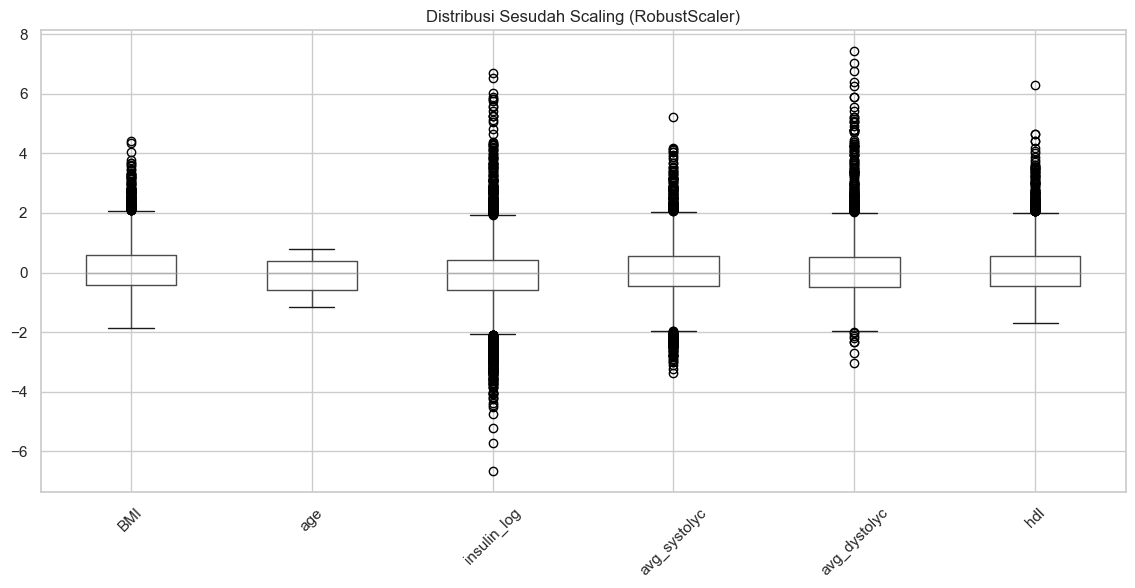

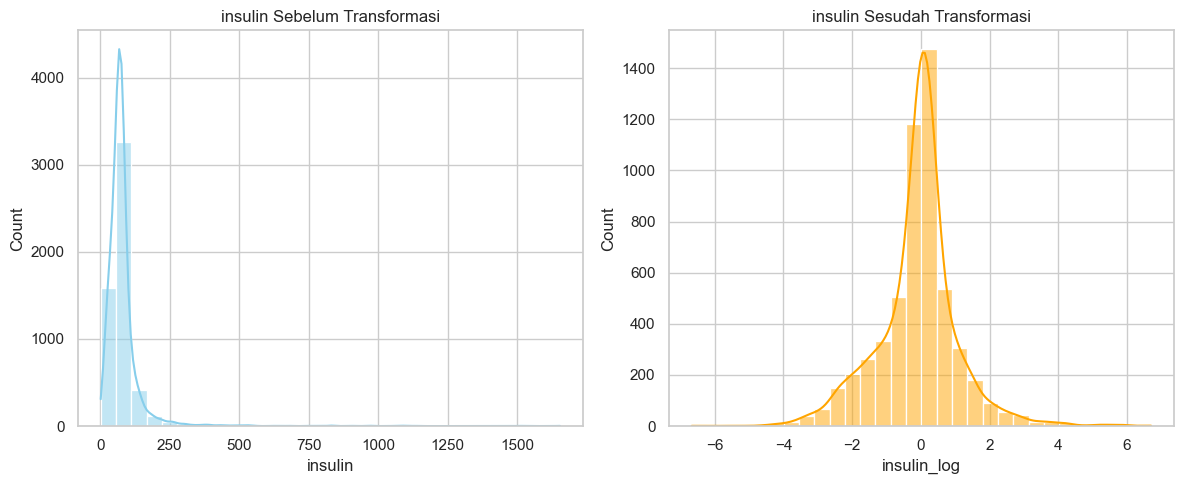

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Atur style biar lebih enak dilihat
sns.set(style="whitegrid")

# Kolom numerik yang mau dicek
num_cols = ['BMI','age','insulin','avg_systolyc','avg_dystolyc','hdl']

# --- 1. Boxplot sebelum scaling ---
plt.figure(figsize=(14,6))
df_clean[num_cols].boxplot()
plt.title("Distribusi Sebelum Scaling")
plt.xticks(rotation=45)
plt.show()

# --- 2. Boxplot sesudah scaling ---
plt.figure(figsize=(14,6))
df_scaled[[c if c!="insulin" else "insulin_log" for c in num_cols]].boxplot()
plt.title("Distribusi Sesudah Scaling (RobustScaler)")
plt.xticks(rotation=45)
plt.show()

# --- 3. Histogram contoh sebelum vs sesudah (misal BMI) ---
fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.histplot(df_clean['insulin'], bins=30, kde=True, ax=axes[0], color="skyblue")
axes[0].set_title("insulin Sebelum Transformasi")

sns.histplot(df_scaled['insulin_log'], bins=30, kde=True, ax=axes[1], color="orange")
axes[1].set_title("insulin Sesudah Transformasi")

plt.tight_layout()
plt.show()


<left>
    <h3>STEP 4 - EXPLORATORY DATA ANALYSIS (EDA)</h3>
    <ul>
        <li>Exploration: Use statistical and visual tools to explore patterns in data.</li>
        <li>Patterns and Trends: Identify underlying patterns, trends and potential challenges within the dataset.</li>
        <li>Insights: Gain valuable insights for informed decisions making in later stages.</li>
        <li>Decision Making: Use EDA for feature engineering and model selection</li>
    </ul>
    <br/>
</left>

---

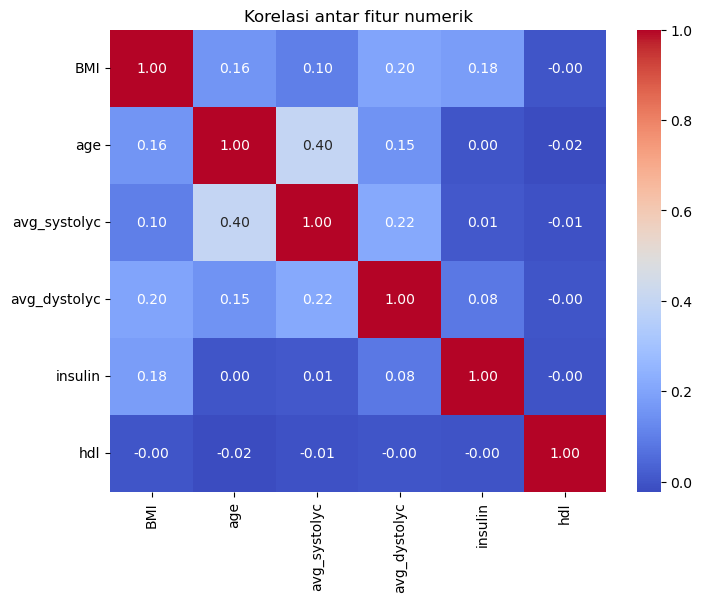

In [12]:
X = df[['BMI', 'age', 'avg_systolyc', 'avg_dystolyc', 'insulin','hdl']]
y = df['Status']

import seaborn as sns
import matplotlib.pyplot as plt

features = ['BMI', 'age', 'avg_systolyc', 'avg_dystolyc', 'insulin','hdl']

corr_matrix = df[features].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korelasi antar fitur numerik")
plt.show()


Data valid untuk korelasi: 2818 baris


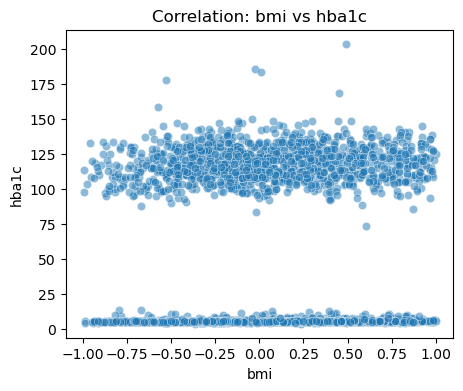

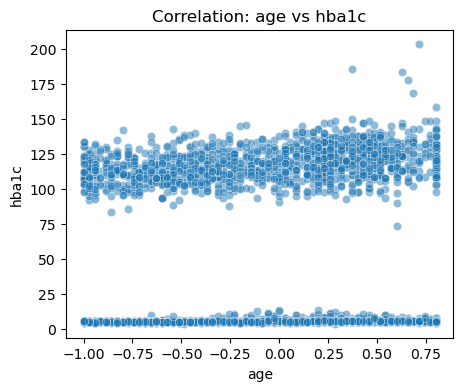

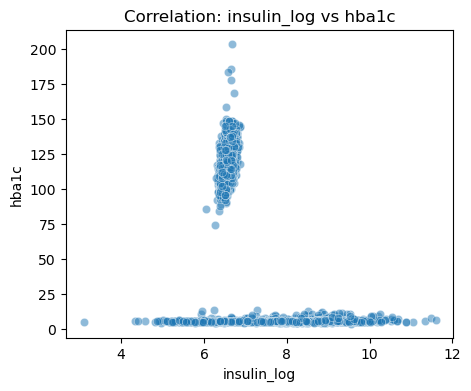

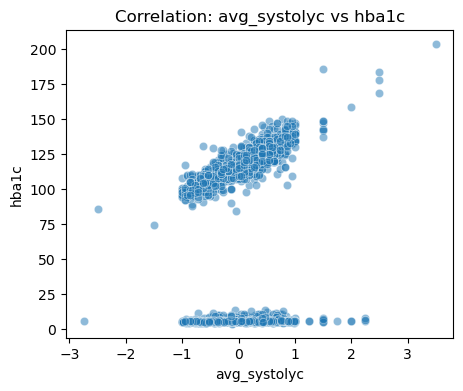

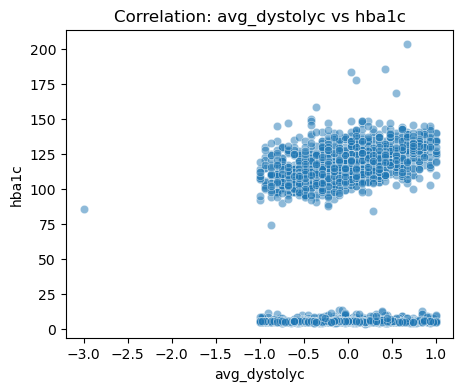

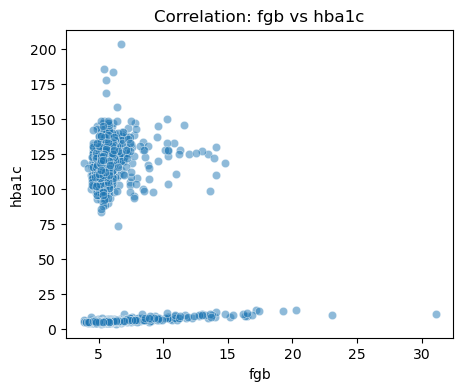


=== Tabel Korelasi Terhadap HbA1c ===
        Feature  Pearson (Linear)  Spearman (Monotonic)
0           bmi             0.043                 0.123
1           age             0.020                 0.199
2   insulin_log            -0.644                -0.434
3  avg_systolyc             0.149                 0.311
4  avg_dystolyc             0.091                 0.164
5           fgb            -0.072                 0.144


In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

# =============================================================
# 1. LOAD & CLEAN DATA (Langkah Wajib)
# =============================================================
df = pd.read_csv("./Dataset/data_scaled_clean.csv", sep=';')
df.columns = df.columns.str.strip().str.lower()  # Normalize column names

# Recalculate insulin_log agar bersih
df["insulin_log"] = np.log1p(df["insulin"])

# Daftar fitur yang mau dicek
# Note: Di file aslinya nama kolomnya 'bmi' (lowercase), bukan 'BMI'
features = ["bmi", "age", "insulin_log", "avg_systolyc", "avg_dystolyc", "fgb"]
target = "hba1c"

# Cleaning Loop: Paksa semua kolom fitur & target jadi angka
all_cols = features + [target]
for col in all_cols:
    if df[col].dtype == 'object':
        df[col] = df[col].astype(str).str.replace(',', '.')
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Buang data yang gagal di-convert (NaN)
df_scaled = df.dropna(subset=all_cols)

print(f"Data valid untuk korelasi: {len(df_scaled)} baris")

# =============================================================
# 2. PERHITUNGAN KORELASI
# =============================================================
results = []

for col in features:
    # Hitung korelasi
    p_corr, p_val = pearsonr(df_scaled[col], df_scaled[target])
    s_corr, s_val = spearmanr(df_scaled[col], df_scaled[target])
    
    results.append({
        "Feature": col,
        "Pearson (Linear)": round(p_corr, 3),
        "Spearman (Monotonic)": round(s_corr, 3)
    })
    
    # Scatter plot
    plt.figure(figsize=(5, 4))
    sns.scatterplot(x=df_scaled[col], y=df_scaled[target], alpha=0.5)
    plt.title(f"Correlation: {col} vs {target}")
    plt.xlabel(col)
    plt.ylabel(target)
    plt.show()

# =============================================================
# 3. TAMPILKAN TABEL HASIL
# =============================================================
results_df = pd.DataFrame(results)
print("\n=== Tabel Korelasi Terhadap HbA1c ===")
print(results_df)

<left>
    <h3>STEP 5 - FEATURE ENGINEERING AND SELECTION</h3>
    <p>Feature engineering and selection is a transformative process that involve selecting only relevant features to enhance model efficiency and prediction while reducing complexity.</p>
    <ul>
        <li>Exploration: Use statistical and visual tools to explore patterns in data.</li>
        <li>Patterns and Trends: Identify underlying patterns, trends and potential challenges within the dataset.</li>
        <li>Insights: Gain valuable insights for informed decisions making in later stages.</li>
        <li>Decision Making: Use EDA for feature engineering and model selection</li>
    </ul>
    <br/>
</left>

---

<left>
    <h4>FEATURE ENGINEERING</h4>
</left>

---

In [ ]:
#Feature extraction

df_bmi['BMI'] = df_bmi['berat'] / ((df_bmi['tinggi'] / 100) ** 2)

output_path = "D:\KULIAH\SEMESTER 5\MachineLearning\Diabetes_MealPlan_Model/bmi_hasil.csv"
df_bmi.to_csv(output_path, index=False)

<>:3: SyntaxWarning: invalid escape sequence '\K'
<>:3: SyntaxWarning: invalid escape sequence '\K'
C:\Users\Frederico\AppData\Local\Temp\ipykernel_16484\2971822307.py:3: SyntaxWarning: invalid escape sequence '\K'
  output_path = "D:\KULIAH\SEMESTER 5\MachineLearning\Diabetes_MealPlan_Model/bmi_hasil.csv"


In [16]:
# Menghitung rata-rata untuk sistolik dan diastolik
df_data_gabungan['avg_systolyc'] = df_data_gabungan[['systolyc2', 'systolyc3']].mean(axis=1)
df_data_gabungan['avg_dystolyc'] = df_data_gabungan[['Dystolyc2', 'Dystolyc3']].mean(axis=1)

# Setelah itu, hapus kolom-kolom asli yang sudah tidak terpakai
df_data_gabungan = df_data_gabungan.drop(columns=['systolyc2', 'systolyc3', 'Dystolyc2', 'Dystolyc3'])

# Simpan ke dua file CSV
df_data_gabungan.to_csv('data_bersih.csv', index=False)

<left>
    <h4>FEATURE SELECTION</h4>
</left>

---

Jumlah data awal: 5538
Jumlah data setelah cleaning: 2818

Feature Importances:
          Fitur  Importance
5   insulin_log    0.504260
2           fgb    0.291707
0           bmi    0.057932
1           age    0.055688
3  avg_systolyc    0.047935
4  avg_dystolyc    0.042479


C:\Users\ASUS\AppData\Local\Temp\ipykernel_28256\3408165795.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Fitur", data=feat_imp, palette="viridis")


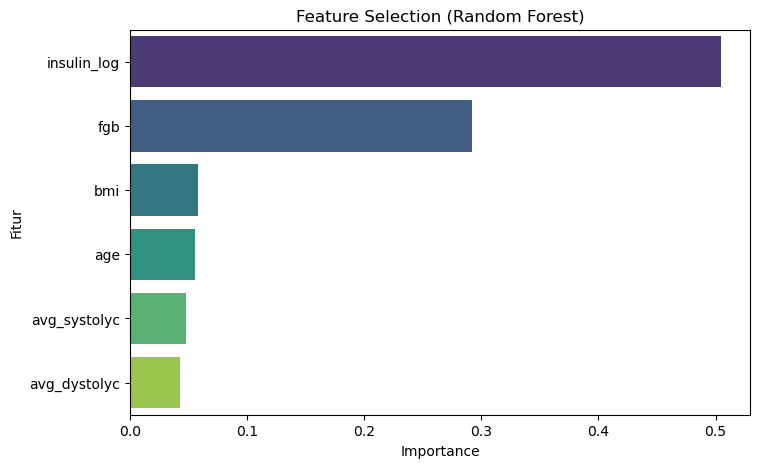

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# =============================================================
# 1. LOAD & CLEAN DATA
# =============================================================
# Load dataset
df = pd.read_csv("./Dataset/data_scaled_clean.csv", sep=';')

# Daftar fitur yang akan digunakan
features = ['bmi', 'age', 'fgb', 'avg_systolyc', 'avg_dystolyc']

# CLEANING: Paksa konversi ke angka, ubah error (seperti '15.975...') jadi NaN
for col in features:
    # Ganti koma dengan titik (jika ada) untuk desimal
    if df[col].dtype == 'object':
        df[col] = df[col].astype(str).str.replace(',', '.')
    
    # Coerce: nilai yang tidak valid akan menjadi NaN
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Hitung ulang insulin_log (karena kolom insulin biasanya bersih/int)
df['insulin_log'] = np.log1p(df['insulin'])

# Tambahkan insulin_log ke daftar fitur
model_features = features + ['insulin_log']

# Hapus baris yang mengandung NaN setelah cleaning
print(f"Jumlah data awal: {len(df)}")
df_clean = df.dropna(subset=model_features + ['status'])
print(f"Jumlah data setelah cleaning: {len(df_clean)}")

# =============================================================
# 2. PERSIAPAN MODEL
# =============================================================
X = df_clean[model_features]
y = df_clean['status']

# Encode label (Non-diabetes, Prediabetes, Diabetes) -> (0, 1, 2)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# =============================================================
# 3. TRAIN RANDOM FOREST
# =============================================================
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X, y_encoded)

# =============================================================
# 4. FEATURE IMPORTANCE
# =============================================================
importances = rf.feature_importances_
feat_imp = pd.DataFrame({'Fitur': model_features, 'Importance': importances})
feat_imp = feat_imp.sort_values(by="Importance", ascending=False)

print("\nFeature Importances:")
print(feat_imp)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x="Importance", y="Fitur", data=feat_imp, palette="viridis")
plt.title("Feature Selection (Random Forest)")
plt.show()

<left>
    <h3>STEP 6 - SPLIT DATA</h3>
    <p>Feature engineering and selection is a transformative process that involve selecting only relevant features to enhance model efficiency and prediction while reducing complexity.</p>
    <ul>
        <li>Exploration: Use statistical and visual tools to explore patterns in data.</li>
        <li>Patterns and Trends: Identify underlying patterns, trends and potential challenges within the dataset.</li>
        <li>Insights: Gain valuable insights for informed decisions making in later stages.</li>
        <li>Decision Making: Use EDA for feature engineering and model selection</li>
    </ul>
    <br/>
</left>

---

In [17]:
from sklearn.model_selection import train_test_split

# Misal kamu sudah punya data feature dan label
X = df_scaled[["BMI","age","insulin","avg_systolyc","avg_dystolyc","hdl"]]  # fitur
y = df_scaled["hba1c"]  # target

# Split data 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,      # 20% untuk data testing
    random_state=42,    # supaya hasilnya konsisten
    stratify=None       # kalau target kamu kategorikal, bisa ganti ke stratify=y
)

# Cek ukuran hasil split
print("Ukuran data latih :", X_train.shape)
print("Ukuran data uji   :", X_test.shape)


Ukuran data latih : (4411, 6)
Ukuran data uji   : (1103, 6)


<left>
    <h3>STEP 7 - DATA LABELING</h3>
    <p>Feature engineering and selection is a transformative process that involve selecting only relevant features to enhance model efficiency and prediction while reducing complexity.</p>
    <ul>
        <li>Exploration: Use statistical and visual tools to explore patterns in data.</li>
        <li>Patterns and Trends: Identify underlying patterns, trends and potential challenges within the dataset.</li>
        <li>Insights: Gain valuable insights for informed decisions making in later stages.</li>
        <li>Decision Making: Use EDA for feature engineering and model selection</li>
    </ul>
    <br/>
</left>

---

In [2]:
import pandas as pd

# Baca dataset (ubah sesuai path)
df = pd.read_csv("Dataset/data_bersih.csv", delimiter=";")

def label_diabetes(row):
    # Aturan dari labeling.pdf (halaman 2)
    if row['hba1c'] >= 6.5 or row['fgb'] >= 7.0:
        return "Diabetes"
    elif (5.7 <= row['hba1c'] < 6.5) or (5.6 <= row['fgb'] < 6.9):
        return "Prediabetes"
    else:
        return "Non-diabetes"

# Tambah kolom Status
df['Status'] = df.apply(label_diabetes, axis=1)

# Cek distribusi label
print(df['Status'].value_counts())

# Simpan dataset baru (opsional)
df.to_csv("data_labeled.csv", index=False)


Status
Diabetes        2941
Prediabetes     1302
Non-diabetes    1295
Name: count, dtype: int64


<left>
    <h3>STEP 8 - EXTRACT HASIL DATA PREPARATION</h3>
    <p>Feature engineering and selection is a transformative process that involve selecting only relevant features to enhance model efficiency and prediction while reducing complexity.</p>
    <ul>
        <li>Exploration: Use statistical and visual tools to explore patterns in data.</li>
        <li>Patterns and Trends: Identify underlying patterns, trends and potential challenges within the dataset.</li>
        <li>Insights: Gain valuable insights for informed decisions making in later stages.</li>
        <li>Decision Making: Use EDA for feature engineering and model selection</li>
    </ul>
    <br/>
</left>

---

Jumlah Data Null pada Dataset hasil Merge

In [ ]:
print(df_data_bersih.isnull().sum())

SEQN            5725
berat           5725
tinggi          5725
BMI             5725
age             5725
fgb             5725
hba1c           5725
insulin         5725
avg_systolyc    5725
avg_dystolyc    5725
hdl             1370
dtype: int64


Tipe data dari masing masing fitur pada data_gabungan ( Hasil Merge) dan % baris Pertama dari setiap fitur

In [14]:
# Jalankan di Data_Preprocessing.ipynb
print("=== Nama Kolom dan Tipe Data ===")
print(df_data_gabungan.info())

print("\n=== 5 Baris Pertama Dataset ===")
display(df_data_gabungan.head())


=== Nama Kolom dan Tipe Data ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11933 entries, 0 to 11932
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SEQN          11933 non-null  float64
 1   berat         11933 non-null  object 
 2   tinggi        8844 non-null   object 
 3   BMI           8566 non-null   float64
 4   age           8560 non-null   float64
 5   fgb           7697 non-null   float64
 6   LBXGH         7610 non-null   float64
 7   LBDINSI       7586 non-null   float64
 8   avg_systolyc  7478 non-null   float64
 9   avg_dystolyc  6473 non-null   float64
dtypes: float64(8), object(2)
memory usage: 932.4+ KB
None

=== 5 Baris Pertama Dataset ===


,SEQN,berat,tinggi,BMI,age,fgb,LBXGH,LBDINSI,avg_systolyc,avg_dystolyc
0,130378.0,86.9,179.5,26.97,43.0,6.27,5.6,93.18,131.5,95.0
1,130379.0,101.8,174.2,33.55,66.0,5.50,5.6,119.46,115.0,76.0
2,130380.0,69.4,152.9,29.69,44.0,8.66,6.2,97.98,108.0,78.0
3,130381.0,34.3,120.1,23.78,5.0,NaN,NaN,NaN,NaN,NaN
4,130382.0,13.6,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Penambahan Feature bau yaitu Gender dan di inisialisasi dengan metode one hot encoding untuk membagi antara gender laki - laki dan perempuan

In [2]:
import pandas as pd

try:
    # --- 1. MEMBACA DATASET ---
    data_labeled = pd.read_csv('data_labeled.csv', delimiter=';')
    gender_data = pd.read_csv('gender.csv', delimiter=';')
    print("✅ Berhasil membaca file 'data_labeled.csv' dan 'gender.csv'.")

    # --- 2. MEMPROSES DATA GENDER ---
    gender_data = gender_data.iloc[:, :2]
    gender_data.columns = ['SEQN', 'gender']
    gender_data.dropna(subset=['SEQN', 'gender'], inplace=True)
    
    # --- 3. INISIALISASI GENDER (MEMBUAT KOLOM KATEGORIKAL) ---
    gender_mapping = {1.0: 'Laki-laki', 2.0: 'Perempuan'}
    gender_data['gender'] = gender_data['gender'].map(gender_mapping)
    print("✅ Kolom 'gender' diubah menjadi kategorikal ('Laki-laki' / 'Perempuan').")

    # --- 4. MENGGABUNGKAN DATASET BERDASARKAN SEQN ---
    merged_data = pd.merge(data_labeled, gender_data, on='SEQN', how='left')
    print("✅ Dataset berhasil digabungkan berdasarkan 'SEQN'.")
    
    # Menghapus baris yang mungkin tidak punya data gender setelah digabungkan
    merged_data.dropna(subset=['gender'], inplace=True)

    # --- 5. MENERAPKAN ONE-HOT ENCODING (LANGKAH BARU) ---
    # Ini akan mengubah kolom 'gender' menjadi 'gender_Laki-laki' dan 'gender_Perempuan'
    final_data = pd.get_dummies(merged_data, columns=['gender'], prefix='gender', dtype=float)
    print("✅ One-Hot Encoding berhasil diterapkan pada kolom 'gender'.")

    # --- 6. MENYIMPAN HASIL AKHIR ---
    output_filename = 'data_final_encoded.csv'
    final_data.to_csv(output_filename, index=False, sep=';')
    print(f"✅ Dataset final yang siap untuk model telah disimpan sebagai: '{output_filename}'")

    # --- Tampilkan hasil akhir ---
    print("\nBerikut adalah pratinjau dataset final setelah One-Hot Encoding:")
    # Menampilkan beberapa kolom relevan untuk verifikasi
    print(final_data[['SEQN', 'Status', 'gender_Laki-laki', 'gender_Perempuan']].head())

except FileNotFoundError as e:
    print(f"❌ ERROR: File tidak ditemukan. Pastikan 'data_labeled.csv' dan 'gender.csv' berada di folder yang sama dengan notebook Anda.")
except Exception as e:
    print(f"❌ Terjadi kesalahan: {e}")

✅ Berhasil membaca file 'data_labeled.csv' dan 'gender.csv'.
✅ Kolom 'gender' diubah menjadi kategorikal ('Laki-laki' / 'Perempuan').
✅ Dataset berhasil digabungkan berdasarkan 'SEQN'.
✅ One-Hot Encoding berhasil diterapkan pada kolom 'gender'.
✅ Dataset final yang siap untuk model telah disimpan sebagai: 'data_final_encoded.csv'

Berikut adalah pratinjau dataset final setelah One-Hot Encoding:
       SEQN        Status  gender_Laki-laki  gender_Perempuan
0  130378.0   Prediabetes               1.0               0.0
1  130379.0  Non-diabetes               1.0               0.0
2  130380.0      Diabetes               0.0               1.0
3  130386.0  Non-diabetes               1.0               0.0
4  130387.0      Diabetes               0.0               1.0


---

## 10. Next Steps
Notebook ini menghasilkan file:
- `data/processed/data_cleaned.csv`
- `data/processed/train_idx.csv`, `val_idx.csv`, `test_idx.csv`
- `data/processed/manifest.json`

Langkah selanjutnya:
1. Lanjutkan ke notebook `Model_Training.ipynb`.
2. Gunakan file `data_cleaned.csv` dan indeks split untuk melatih model secara konsisten.

